In [1]:
import pandas as pd
import re
import datetime

In [2]:
base1000_df = pd.read_csv('data/accre-jobs-2020.csv', nrows=1000)
base1000_df.shape

(1000, 13)

In [3]:
base1000_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JOBID      1000 non-null   object
 1   ACCOUNT    1000 non-null   object
 2   USER       1000 non-null   object
 3   REQMEM     1000 non-null   object
 4   USEDMEM    1000 non-null   object
 5   REQTIME    1000 non-null   object
 6   USEDTIME   1000 non-null   object
 7   NODES      1000 non-null   int64 
 8   CPUS       1000 non-null   int64 
 9   PARTITION  1000 non-null   object
 10  EXITCODE   1000 non-null   object
 11  STATE      1000 non-null   object
 12  NODELIST   1000 non-null   object
dtypes: int64(2), object(11)
memory usage: 101.7+ KB


In [4]:
base1000_df = base1000_df[base1000_df['PARTITION']=='production']

In [5]:
#base1000_df = base1000_df[base1000_df['EXITCODE']=='0:0']

In [6]:
base1000_df['HHMMSS_USED'] = base1000_df['USEDTIME'].str.extract('(\d{2}:\d{2}:\d{2})')

In [7]:
base1000_df['DAYS_USED'] = base1000_df['USEDTIME'].str.extract('(\d+)-')

In [8]:
base1000_df['DAYS_USED'] = base1000_df['DAYS_USED'].fillna(0)

In [9]:
base1000_df['DAYS_USED'] = base1000_df['DAYS_USED'].astype(int)

In [10]:
base1000_df['HH_USED'] = base1000_df['HHMMSS_USED'].str.extract('(\d+):')
base1000_df['MM_USED'] = base1000_df['HHMMSS_USED'].str.extract(':(\d+):')
base1000_df['SS_USED'] = base1000_df['HHMMSS_USED'].str.extract(':\d+:(\d+)')

In [11]:
base1000_df['HH_USED'] = base1000_df['HH_USED'].astype(int)
base1000_df['MM_USED'] = base1000_df['MM_USED'].astype(int)
base1000_df['SS_USED'] = base1000_df['SS_USED'].astype(int)

In [12]:
day_sec = base1000_df['DAYS_USED'] * 24 * 60 * 60
hour_sec = base1000_df['HH_USED']*3600
minute_sec = base1000_df['MM_USED']*60

In [13]:
base1000_df['TOTAL_SEC_USED'] = day_sec + hour_sec + minute_sec + base1000_df['SS_USED']

In [14]:
base1000_df['HHMMSS_REQ'] = base1000_df['REQTIME'].str.extract('(\d{2}:\d{2}:\d{2})')
base1000_df['DAYS_REQ'] = base1000_df['REQTIME'].str.extract('(\d+)-')

In [15]:
base1000_df['HH_REQ'] = base1000_df['HHMMSS_REQ'].str.extract('(\d+):')
base1000_df['MM_REQ'] = base1000_df['HHMMSS_REQ'].str.extract(':(\d+):')
base1000_df['SS_REQ'] = base1000_df['HHMMSS_REQ'].str.extract(':\d+:(\d+)')

In [16]:
base1000_df['HH_REQ'] = base1000_df['HH_REQ'].astype(int)
base1000_df['MM_REQ'] = base1000_df['MM_REQ'].astype(int)
base1000_df['SS_REQ'] = base1000_df['SS_REQ'].astype(int)
base1000_df['DAYS_REQ'] = base1000_df['DAYS_REQ'].fillna(0).astype(int)

In [17]:
day_secr = base1000_df['DAYS_REQ'] * 24 * 60 * 60
hour_secr = base1000_df['HH_REQ']*3600
minute_secr = base1000_df['MM_REQ']*60

In [18]:
base1000_df['TOTAL_SEC_REQ'] = day_secr + hour_secr + minute_secr + base1000_df['SS_REQ']

In [19]:
base1000_df = base1000_df.drop(columns=['HHMMSS_REQ', 'DAYS_REQ', 'HH_REQ', 'MM_REQ', 'SS_REQ', 'SS_USED','HHMMSS_USED', 'DAYS_USED', 'HH_USED', 'MM_USED' ,'SS_USED'])

In [20]:
base1000_df

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST,TOTAL_SEC_USED,TOTAL_SEC_REQ
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531,1188028,1188000
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441,1090256,1188000
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464,1188020,1188000
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473,1050632,1188000
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440,1188003,1188000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17016721_16,sunburst,darlyne,8192Mn,2547.97M,14-00:00:00,7-17:16:46,1,1,production,0:0,COMPLETED,cn322,667006,1209600
996,17016721_17,sunburst,darlyne,8192Mn,1950.11M,14-00:00:00,7-03:03:50,1,1,production,0:0,COMPLETED,cn322,615830,1209600
997,17016721_18,sunburst,darlyne,8192Mn,2450.23M,14-00:00:00,7-09:59:09,1,1,production,0:0,COMPLETED,cn322,640749,1209600
998,17016721_19,sunburst,darlyne,8192Mn,2743.43M,14-00:00:00,7-12:40:23,1,1,production,0:0,COMPLETED,cn322,650423,1209600


In [21]:
base1000_df['CPUS'].value_counts()

1     942
24     24
16     16
12      6
7       1
5       1
4       1
Name: CPUS, dtype: int64



While we have systematic checks in place to ensure the general system health of each compute node, we would like to use long-term data to see if there are any clusters of job failures on specific nodes. Do any of the production partition nodes show an unusual number of failed jobs relative to the others? Ignore the debug partition for this question.


In [22]:
full_df = pd.read_csv('data/accre-jobs-2020.csv', error_bad_lines=False)

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

b'Skipping line 737407: expected 13 fields, saw 16\nSkipping line 753640: expected 13 fields, saw 14\nSkipping line 755322: expected 13 fields, saw 16\nSkipping line 773545: expected 13 fields, saw 15\nSkipping line 775580: expected 13 fields, saw 16\nSkipping line 775822: expected 13 fields, saw 56\nSkipping line 776044: expected 13 fields, saw 57\nSkipping line 776410: expected 13 fields, saw 16\nSkipping line 776465: expected 13 fields, saw 18\nSkipping line 777411: expected 13 fields, saw 14\nSkipping line 778897: expected 13 fields, saw 14\nSkipping line 778909: expected 13 fields, saw 14\nSkipping line 779030: expected 13 fields, saw 14\nSkipping line 779044: expected 13 fields, saw 14\nSkipping line 779162: expected 13 fields, saw 14\nSkipping line 783281: expected 13 fields, saw 14\nSkipping line 783282: expected 13 fields, saw 14\nSkipping line 783283: expected 13 fields, saw 14\nSkipping line 783284: expected 13 fields, saw 14\nSkipping line 783285: expected 13 fields, saw 14

b'Skipping line 919450: expected 14 fields, saw 16\nSkipping line 919451: expected 14 fields, saw 16\nSkipping line 919453: expected 14 fields, saw 15\nSkipping line 919454: expected 14 fields, saw 15\nSkipping line 919459: expected 14 fields, saw 16\nSkipping line 919462: expected 14 fields, saw 16\nSkipping line 919599: expected 14 fields, saw 16\nSkipping line 919601: expected 14 fields, saw 16\nSkipping line 936638: expected 14 fields, saw 16\nSkipping line 941490: expected 14 fields, saw 15\nSkipping line 941493: expected 14 fields, saw 15\nSkipping line 941494: expected 14 fields, saw 15\nSkipping line 941495: expected 14 fields, saw 16\nSkipping line 941496: expected 14 fields, saw 16\nSkipping line 941497: expected 14 fields, saw 16\nSkipping line 941499: expected 14 fields, saw 16\nSkipping line 941500: expected 14 fields, saw 16\nSkipping line 941501: expected 14 fields, saw 15\nSkipping line 941502: expected 14 fields, saw 16\nSkipping line 941509: expected 14 fields, saw 15

b'Skipping line 1973533: expected 14 fields, saw 15\nSkipping line 1978566: expected 14 fields, saw 17\nSkipping line 1979172: expected 14 fields, saw 16\nSkipping line 1980867: expected 14 fields, saw 17\nSkipping line 1981386: expected 14 fields, saw 17\nSkipping line 2003420: expected 14 fields, saw 17\nSkipping line 2010202: expected 14 fields, saw 22\nSkipping line 2010243: expected 14 fields, saw 22\nSkipping line 2011558: expected 14 fields, saw 15\nSkipping line 2014824: expected 14 fields, saw 44\nSkipping line 2015216: expected 14 fields, saw 48\nSkipping line 2015303: expected 14 fields, saw 36\nSkipping line 2016044: expected 14 fields, saw 41\nSkipping line 2016097: expected 14 fields, saw 32\nSkipping line 2016852: expected 14 fields, saw 48\nSkipping line 2019008: expected 14 fields, saw 19\nSkipping line 2024940: expected 14 fields, saw 15\nSkipping line 2024947: expected 14 fields, saw 15\nSkipping line 2024955: expected 14 fields, saw 15\n'
b'Skipping line 2081253: ex

b'Skipping line 2315585: expected 14 fields, saw 15\nSkipping line 2315586: expected 14 fields, saw 16\nSkipping line 2315590: expected 14 fields, saw 15\nSkipping line 2320415: expected 14 fields, saw 17\nSkipping line 2320416: expected 14 fields, saw 16\nSkipping line 2320417: expected 14 fields, saw 16\nSkipping line 2320418: expected 14 fields, saw 17\nSkipping line 2320419: expected 14 fields, saw 17\nSkipping line 2320420: expected 14 fields, saw 16\nSkipping line 2320421: expected 14 fields, saw 16\nSkipping line 2320422: expected 14 fields, saw 16\nSkipping line 2320423: expected 14 fields, saw 15\nSkipping line 2320424: expected 14 fields, saw 17\nSkipping line 2320425: expected 14 fields, saw 17\nSkipping line 2320426: expected 14 fields, saw 15\nSkipping line 2320427: expected 14 fields, saw 15\nSkipping line 2320428: expected 14 fields, saw 17\nSkipping line 2320429: expected 14 fields, saw 17\nSkipping line 2320430: expected 14 fields, saw 17\nSkipping line 2320431: expect

b'Skipping line 2959883: expected 14 fields, saw 16\nSkipping line 2959884: expected 14 fields, saw 16\nSkipping line 2960561: expected 14 fields, saw 16\nSkipping line 2969847: expected 14 fields, saw 15\nSkipping line 2981820: expected 14 fields, saw 19\nSkipping line 3005622: expected 14 fields, saw 16\n'
b'Skipping line 3019713: expected 14 fields, saw 16\nSkipping line 3021043: expected 14 fields, saw 16\nSkipping line 3021044: expected 14 fields, saw 16\nSkipping line 3032685: expected 14 fields, saw 15\nSkipping line 3032905: expected 14 fields, saw 15\nSkipping line 3034752: expected 14 fields, saw 15\nSkipping line 3046015: expected 14 fields, saw 26\nSkipping line 3063701: expected 14 fields, saw 21\nSkipping line 3064318: expected 14 fields, saw 15\n'
b'Skipping line 3085675: expected 14 fields, saw 16\nSkipping line 3119735: expected 14 fields, saw 16\nSkipping line 3119756: expected 14 fields, saw 16\n'
b'Skipping line 3227316: expected 14 fields, saw 15\n'
b'Skipping line

In [23]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813593 entries, 0 to 3813592
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.2+ MB


In [24]:
full_df = full_df[full_df['PARTITION']=='production']

In [25]:
failed_jobs = full_df[full_df['EXITCODE']!='0:0']

In [26]:
node_failure_counts = failed_jobs['NODELIST'].value_counts()

In [27]:
node_failure_df = pd.DataFrame(node_failure_counts)

In [28]:
node_failure_df = node_failure_df.reset_index()

In [31]:
node_failure_df.columns = ['NODELIST','FAIL_COUNT']

In [46]:
problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>3]
problem_nodes

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn1347,15
2,cn416,15
3,cn304,14
4,cn1085,10
...,...,...
70,cn1288,4
71,cn1464,4
72,cn374,4
73,cn[1468-1469],4


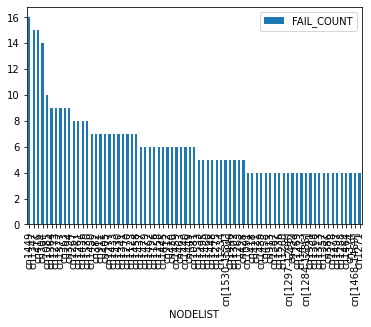

In [49]:
problem_nodes.plot(kind='bar',x='NODELIST', y='FAIL_COUNT');